# In Non-Parametric Regression Part



## 1) Implement density estimation using cosine kernel without sckit-learn package

## 2) Implement kernel smoothing with epanechnikov kernel


====================================================================

### Importing Modules

In [1]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
%matplotlib inline  

### Define User's Function : Kernels

In [2]:
def cosine_score(real_X,point_X,h):
    
    o=(real_X-point_X)/h
    if abs(o)<=1:
        return (math.pi/4)*(math.cos((math.pi/2)*o))
    else:
        return 0

def gausi_f(real_X,point_X,h):
    o=(real_X-point_X)/h
    return (np.exp(-(o.T*o)/2)/math.sqrt(2*math.pi))


def epan_f(real_X, point_X, h):
    o=(real_X-point_X)/h
    if abs(o)<=1:
        return (3/4)*(1-(o**2))
    else:
        return 0   

### Assignments 1

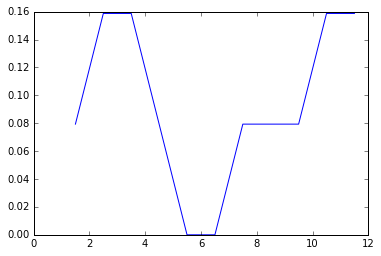

In [3]:
real_X=[2,3,4,8,10,11,12]
point_X=np.arange(1.5,12.5,1)
h=1; Y=[]

for point in point_X:
    y=0
    for real in real_X:
        y=y+cosine_score(real,point,h)
    Y=Y+[y/(len(real_X)*h)]

plt.plot(point_X,Y)    
plt.show()    

### Assignments 2

C:\Users\jeonyunsu\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  app.launch_new_instance()


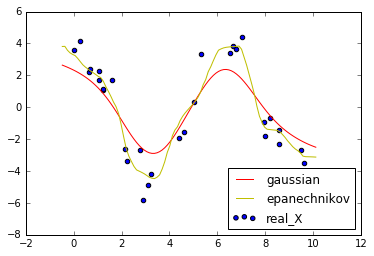

In [4]:
frame='dataset-kernelsmooth.txt'
data=pd.read_table(frame,sep='\t',names=['var','target'])
data=data.sort(['var'])

real_X=data['var']
real_Y=data['target']

point_X=np.linspace(min(real_X)-0.5,max(real_X)+0.5,100)

h=1
f_point=[]
for point in point_X:
    o=[sum(gausi_f(real_X, point,h)*real_Y)/sum(gausi_f(real_X, point,h))]
    f_point=f_point+o

f_point2=[]
for point in point_X:
    upper, bottom=0,0

    for real, Y in zip(real_X, real_Y):
        upper=upper + epan_f(real, point,h)*Y
        bottom=bottom + epan_f(real, point,h)
        
    f_point2=f_point2+[(upper/bottom)]

fig, ax = plt.subplots()
ax.plot(point_X, f_point, 'r-',label='gaussian')
ax.plot(point_X, f_point2, 'y-',label='epanechnikov')
ax.scatter(real_X, real_Y,label='real_X')
ax.legend(loc='lower right')
plt.show()